- Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
- Figure out if any preprocessing such as scaling would help here
- Draw elbow plot and from that figure out optimal value of k

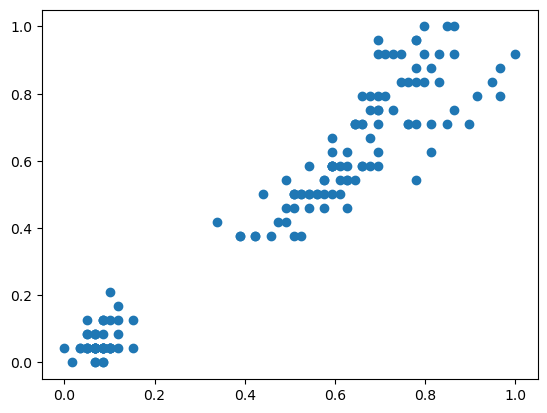

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.drop(columns = ["sepal length (cm)","sepal width (cm)"],inplace = True)

x = np.array(df["petal length (cm)"])
y = np.array(df["petal width (cm)"])

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_ = scaler_x.fit_transform(x.reshape(-1,1))
y_ = scaler_y.fit_transform(y.reshape(-1,1))
df["petal length (cm)"] = x_
df["petal width (cm)"] = y_
plt.scatter(x_,y_)

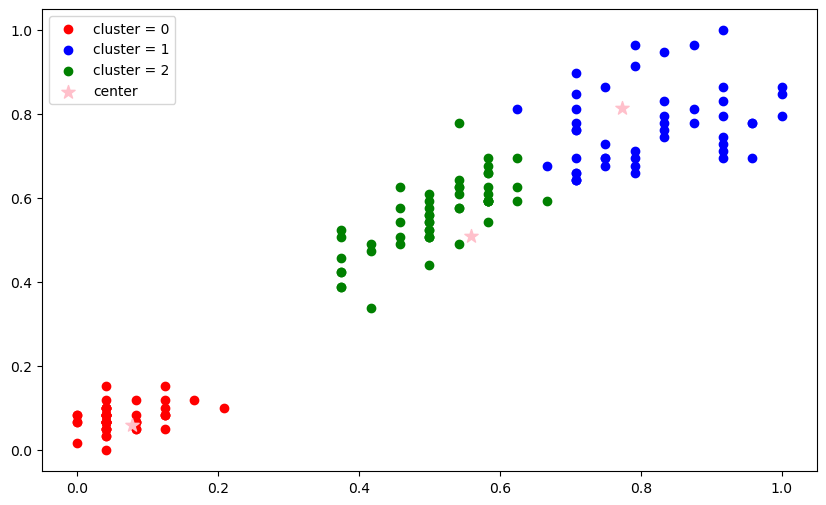

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
cluster = km.fit_predict(df)
centers = km.cluster_centers_
df["cluster"] = cluster
centers

plt.figure(figsize = (10,6))
plt.scatter(df[df["cluster"] == 0]["petal width (cm)"],
            df[df["cluster"] == 0]["petal length (cm)"],
            color = "red",label = "cluster = 0")
plt.scatter(df[df["cluster"] == 1]["petal width (cm)"],
            df[df["cluster"] == 1]["petal length (cm)"],
            color = "blue",label = "cluster = 1")
plt.scatter(df[df["cluster"] == 2]["petal width (cm)"],
            df[df["cluster"] == 2]["petal length (cm)"],
            color = "green",label = "cluster = 2")
plt.scatter(centers[:,0],centers[:,1],marker = "*",s = 100,
            color = "pink",label = "center")
plt.legend()

Text(0, 0.5, 'Sum of Squred Error')

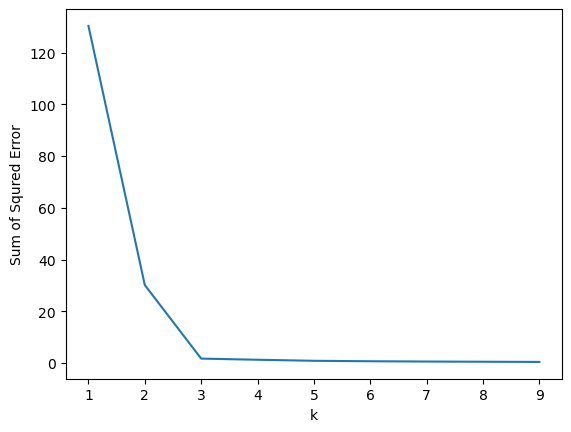

In [12]:
sse_list = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse = km.inertia_
    sse_list.append(sse)

plt.plot(k_rng,sse_list)
plt.xlabel("k")
plt.ylabel("Sum of Squred Error")